# PROYECTO 2 - Credit Card Payment
### Modelo SVM y preparacion para UI
María Inés Vásquez Figueroa 18250\
Diana Ximena de León Figueroa 18607\
María José Castro Lemus 181202\
Paula Camila González Ortega

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
# puede ser necesario o no, dependiendo de su versión de NoteBook
%matplotlib inline

In [2]:
df = pd.read_csv('./datafinal.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  30000 non-null  int64  
 1   limit_bal           30000 non-null  float64
 2   sex                 30000 non-null  int64  
 3   education           30000 non-null  int64  
 4   marriage            30000 non-null  int64  
 5   age                 30000 non-null  int64  
 6   pay_sep             30000 non-null  int64  
 7   pay_ago             30000 non-null  int64  
 8   pay_jul             30000 non-null  int64  
 9   pay_jun             30000 non-null  int64  
 10  pay_may             30000 non-null  int64  
 11  pay_apr             30000 non-null  int64  
 12  bill_amt_sep        30000 non-null  float64
 13  bill_amt_ago        30000 non-null  float64
 14  bill_amt_jul        30000 non-null  float64
 15  bill_amt_jun        30000 non-null  float64
 16  bill

In [4]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_sep,pay_ago,pay_jul,pay_jun,...,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_ago,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,payment_next_month,months_late
0,1,20000.0,1,2,0,24,2,2,0,0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,2
1,2,120000.0,1,2,1,26,0,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2
2,3,90000.0,1,2,1,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
3,4,50000.0,1,2,0,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,5,50000.0,0,2,0,57,0,0,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0


## Preparación de los datos

In [5]:
# eliminar columna con info poco valiosa
df.drop('id', axis=1, inplace=True)

In [6]:
var_dummies = ['sex', 'marriage']

for i in var_dummies:
    # convertir a variables dummies
    value_dummies = pd.get_dummies(df[i], prefix=i, drop_first=True)
    df = pd.concat([df.drop(i, axis=1), value_dummies], axis=1)

df.columns

Index(['limit_bal', 'education', 'age', 'pay_sep', 'pay_ago', 'pay_jul',
       'pay_jun', 'pay_may', 'pay_apr', 'bill_amt_sep', 'bill_amt_ago',
       'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr',
       'pay_amt_sep', 'pay_amt_ago', 'pay_amt_jul', 'pay_amt_jun',
       'pay_amt_may', 'pay_amt_apr', 'payment_next_month', 'months_late',
       'sex_1', 'marriage_1', 'marriage_2'],
      dtype='object')

## División Train/Test

In [7]:
from sklearn.model_selection import train_test_split

In [18]:
# Se eliminan todas las columnas que no estan altamente correlacionadas con la variable y
X = df.drop(['limit_bal', 'sex_1', 'bill_amt_sep', 'bill_amt_ago',
       'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr',
       'pay_amt_sep', 'pay_amt_ago', 'pay_amt_jul', 'pay_amt_apr', 'payment_next_month', 'education',
       'marriage_1', 'marriage_2', 'pay_sep', 'pay_ago', 'pay_jul','pay_jun', 'pay_may', 'pay_apr'], axis=1).values
#X = df[['age', 'months_late','pay_amt_may', 'pay_amt_jun', 'age']].values
y = df['payment_next_month'].values

### Balancing data

In [9]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

sm = SMOTE(random_state=2)
X_balanced, y_balanced = sm.fit_resample(X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_balanced.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_balanced.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_balanced == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced == 0)))

Before OverSampling, counts of label '1': 6636
Before OverSampling, counts of label '0': 23364 

After OverSampling, the shape of train_X: (46728, 4)
After OverSampling, the shape of train_y: (46728,) 

After OverSampling, counts of label '1': 23364
After OverSampling, counts of label '0': 23364


In [19]:
# dividir en entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.20, random_state=101)

In [20]:
len(y_train)

37382

## Normalización de los datos

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

## SVM

###  SVC (Support Vector Classifier)

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [26]:
# Definir los kernels que vamos a probar
kernels = ['rbf', 'linear', 'poly', 'sigmoid']

svc = SVC()
hyperParam = [{'kernel': kernels}]

gsv = GridSearchCV(svc, hyperParam, cv = 5, verbose = 2, n_jobs=4)

# Entrenar el modelo
best_model = gsv.fit(X_train, y_train)

# Predecir resultados
svc_pred_mms = best_model.best_estimator_.predict(X_test)

print("Mejor hiperparametro: ", gsv.best_params_['kernel'])
print("Accuracy mas alto: ", best_model.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejor hiperparametro:  rbf
Accuracy mas alto:  0.7487695270704045


### Evaluacion del modelo

In [27]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

Matriz de confusion: 
 [[3545 1142]
 [1206 3453]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      4687
           1       0.75      0.74      0.75      4659

    accuracy                           0.75      9346
   macro avg       0.75      0.75      0.75      9346
weighted avg       0.75      0.75      0.75      9346

Accuracy: 0.7487695270704045 

Recall/Sensitivity/True Positive Rate: 0.7411461687057308 

Precision: 0.7514689880304679 



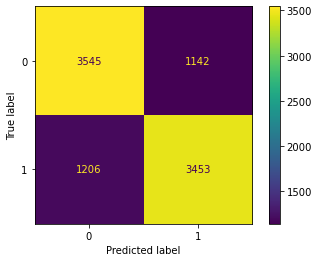

In [28]:
plot_confusion_matrix(gsv, X_test, y_test)

conf_metr = confusion_matrix(y_test, svc_pred_mms)

print("Matriz de confusion: \n {}".format(conf_metr))
print(metrics.classification_report(y_test, svc_pred_mms))
print("Accuracy: {} \n".format(metrics.accuracy_score(y_test, svc_pred_mms)))
print("Recall/Sensitivity/True Positive Rate: {} \n".format(metrics.recall_score(y_test, svc_pred_mms)))
print("Precision: {} \n".format(metrics.precision_score(y_test, svc_pred_mms)))

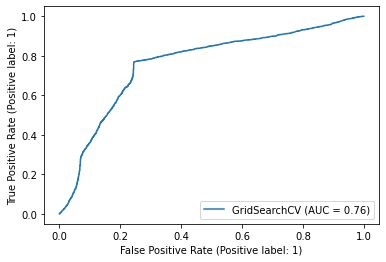

In [29]:
# ROC Curve:
metrics.plot_roc_curve(gsv, X_test, y_test)

In [30]:
import pickle

In [31]:
filename = 'finalized_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [32]:
# some time later...
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7487695270704045


Fuente de consulta: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

### Guardar el Escalador y modelo

In [33]:
import joblib
joblib.dump(scaler,'escalador_cc.pkl')

['escalador_cc.pkl']

In [34]:
#best_model.save("modelo_final_cc.h5")
joblib.dump(best_model, 'modelo_final_cc.h5')

['modelo_final_cc.h5']

## Proceso para predecir un pago nuevo

In [35]:
from tensorflow.keras.models import load_model

In [36]:
modelo_cc = joblib.load("modelo_final_cc.h5")
escalador_cc = joblib.load("escalador_cc.pkl")

In [37]:
df.head()
#df.to_csv(r'datafinalmodelo.csv', index = False, header=True)

,limit_bal,education,age,pay_sep,pay_ago,pay_jul,pay_jun,pay_may,pay_apr,bill_amt_sep,...,pay_amt_ago,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,payment_next_month,months_late,sex_1,marriage_1,marriage_2
0,20000.0,2,24,2,2,0,0,0,0,3913.0,...,689.0,0.0,0.0,0.0,0.0,1,2,1,0,0
1,120000.0,2,26,0,2,0,0,0,2,2682.0,...,1000.0,1000.0,1000.0,0.0,2000.0,1,2,1,1,0
2,90000.0,2,34,0,0,0,0,0,0,29239.0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,1,0
3,50000.0,2,37,0,0,0,0,0,0,46990.0,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0
4,50000.0,2,57,0,0,0,0,0,0,8617.0,...,36681.0,10000.0,9000.0,689.0,679.0,0,0,0,0,0


In [38]:
df.columns
#df['pay_ago_1'].value_counts()

Index(['limit_bal', 'education', 'age', 'pay_sep', 'pay_ago', 'pay_jul',
       'pay_jun', 'pay_may', 'pay_apr', 'bill_amt_sep', 'bill_amt_ago',
       'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr',
       'pay_amt_sep', 'pay_amt_ago', 'pay_amt_jul', 'pay_amt_jun',
       'pay_amt_may', 'pay_amt_apr', 'payment_next_month', 'months_late',
       'sex_1', 'marriage_1', 'marriage_2'],
      dtype='object')

In [47]:
cliente_muestra = {'age':23,              
                   'months_late':2,
                   'pay_amt_may':35000,
                   'pay_amt_jun':10000}

In [40]:
cliente_muestra.keys()

dict_keys(['age', 'months_late', 'pay_amt_may', 'pay_amt_jun'])

In [41]:
from sklearn.preprocessing import LabelBinarizer
codificador = LabelBinarizer()
final_y = codificador.fit_transform(y)
codificador.classes_

array([0, 1], dtype=int64)

In [58]:
def devuelve_prediccion(modelo, escalador, muestra_json):
    
    age = muestra_json['age']
    months_late = muestra_json['months_late']
    pay_amt_may = muestra_json['pay_amt_may']
    pay_amt_jun = muestra_json['pay_amt_jun']
    
    cliente = [[age, months_late,
             pay_amt_may, pay_amt_jun]]
    
    cliente = escalador.transform(cliente)
    
    clases = np.array([0,1])
    
    #clase_ind = modelo.predict_classes(flor)
    clase_ind = np.argmax(modelo.predict(cliente), axis=-1)
    
    return clases[clase_ind][0]

In [59]:
prediccion = devuelve_prediccion(modelo_rna,
                    escalador_rna,
                    cliente_muestra)
prediccion

NameError: name 'modelo_rna' is not defined

In [57]:
if(prediccion=='0'):
    print('No tendra incumplimiento de pago al mes siguiente ')
else:
    print('Si tendra incumplimiento de pago al mes siguiente ')

No tendra incumplimiento de pago al mes siguiente 
